In [2]:
import numpy as np
import pandas as pd
from numpy import array, median
from hw import Jamshidian as jamsh
from hw import Henrard as henr
from hw import calibration as hw_calib
from hw.const import *
from fox_toolbox.utils import rates
from fox_toolbox.utils import xml_parser
from fox_toolbox.utils.rates import RateCurve
from tsr import csv_parser, tsr
from random import choice
import matplotlib.pyplot as plt
from tsr import linear
from copy import deepcopy

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)


%load_ext autoreload
%autoreload 2

### Read IRSM FORM

In [20]:
cms_xml = xml_parser.get_files('irsmform_mono.xml', folder = '../linear TSR logs/monocurve')
cms_csv = xml_parser.get_files('CMS_Replication', folder = '../linear TSR logs/monocurve')

main_curve, estim_curves = xml_parser.get_rate_curves(cms_xml)
dsc_curve = main_curve

try:
    estim_curve = estim_curves[0]
except TypeError:
    estim_curve = main_curve

cms_replic_basket = csv_parser.parse_csv(cms_csv)
cal_basket = list(xml_parser.get_calib_basket(cms_xml))

In [46]:
for (caplet, floorlet) in cms_replic_basket:
    print('model a: ', caplet.model.a, ' model b: ', caplet.model.b)

model a:  0.478608156805      model b:  0.0981957187685
model a:  0.4785373113854      model b:  0.0982316497288
model a:  0.4785093788662      model b:  0.0982372881571
model a:  0.4773556373036      model b:  0.098242998818
model a:  0.4787325894451      model b:  0.0982911490944
model a:  0.4788713531635      model b:  0.098214954145
model a:  0.4784815072479      model b:  0.0982138742655
model a:  0.4780504617738      model b:  0.0982369315742
model a:  0.4783508532524      model b:  0.0982547115471
model a:  0.4775625435531      model b:  0.0982454222839
model a:  0.4788409445942      model b:  0.0981997025307
model a:  0.4784733052113      model b:  0.0982008086629
model a:  0.4784244681158      model b:  0.0982280269927
model a:  0.4783886652063      model b:  0.0982551114068
model a:  0.4784307564342      model b:  0.0982279548184
model a:  0.4776837430203      model b:  0.0982302937138
model a:  0.4788400808416      model b:  0.0981997151605
model a:  0.4784666953516      mod

In [90]:
caplet1 = cms_replic_basket[0][0]
swo1 = cal_basket[0]
mr = 0.06

In [99]:
linear.get_a(caplet1.pmnt_date, dsc_curve, swo1, mr, estim_curve)

(0.4786081699414995, 0.0981957187946182)

In [104]:
diff_a, diff_b = [], []
for (caplet, floorlet), swo in zip(cms_replic_basket, cal_basket):
    diff_a.append(caplet.model.a - linear.get_a(caplet.pmnt_date, dsc_curve, swo, mr, estim_curve)[0])
    diff_b.append(caplet.model.b - linear.get_a(caplet.pmnt_date, dsc_curve, swo, mr, estim_curve)[1])

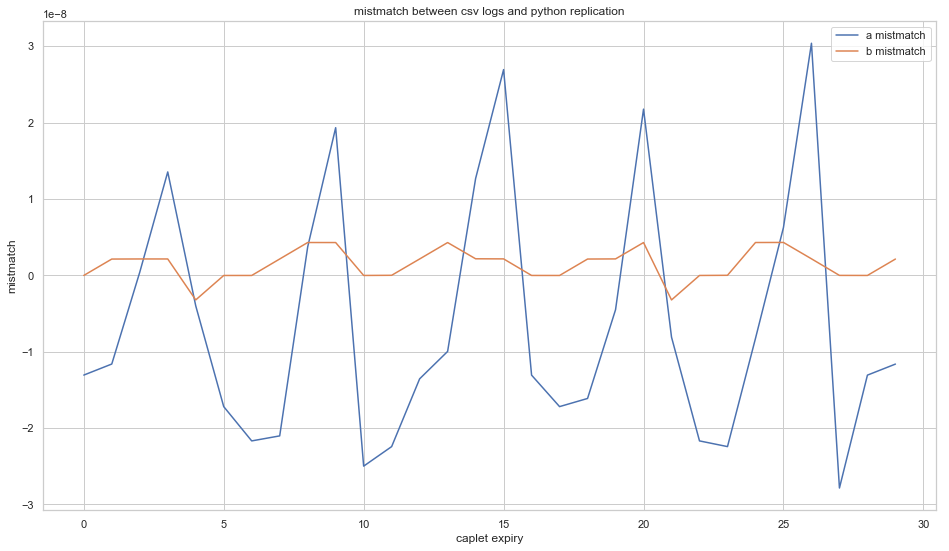

In [113]:
plt.plot(array(diff_a), label='a mistmatch')
plt.plot(array(diff_b), label='b mistmatch')
plt.title('mistmatch between csv logs and python replication')
plt.ylabel('mistmatch')
plt.xlabel('caplet expiry')
plt.legend()